In [1]:
!nvidia-smi

Tue May 27 15:14:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


(Dataset)[https://universe.roboflow.com/brain-tumor-detection-b2faq/mri-tumor-detection-ampnm/dataset/2/download]

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QPnypz6jTqSK3sauF1hK")
project = rf.workspace("brain-tumor-detection-b2faq").project("mri-tumor-detection-ampnm")
version = project.version(2)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to MRI-Tumor-Detection-2 in yolov12:: 100%|██████████| 2550/2550 [00:00<00:00, 10619.09it/s]


100%|██████████| 18.1M/18.1M [00:00<00:00, 212MB/s]



image 1/1 /content/MRI-Tumor-Detection-2/train/images/00018_101_jpg.rf.a68e0f1742c774b87c41680378e2a1b3.jpg: 640x640 1 person, 21.1ms
Speed: 2.2ms preprocess, 21.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7


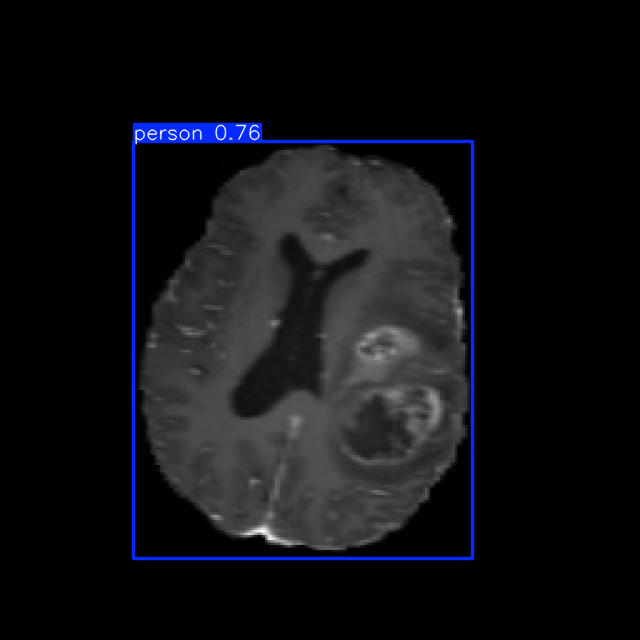

In [50]:
from ultralytics import YOLO
# Load a model
model = YOLO("yolo12s.pt")
result = model("/content/MRI-Tumor-Detection-2/train/images/00018_101_jpg.rf.a68e0f1742c774b87c41680378e2a1b3.jpg", conf=0.25, save=True)
result[0].show()

In [51]:
!pip install ruamel.yaml

In [52]:

import sys
import ruamel.yaml

yaml = ruamel.yaml.YAML()


with open('/content/MRI-Tumor-Detection-2/data.yaml') as fp:
  data = yaml.load(fp)
  # Correct the paths to the image directories
  data['train'] = "/content/MRI-Tumor-Detection-2/train/images"
  data['test'] = "/content/MRI-Tumor-Detection-2/test/images"
  data['val'] = "/content/MRI-Tumor-Detection-2/valid/images"

  print(data['train'])
  print(data['test'])
  print(data['val'])

  # save the files
  with open('data.yaml', 'w') as fp :
    yaml.dump(data, fp)

/content/MRI-Tumor-Detection-2/train/images
/content/MRI-Tumor-Detection-2/test/images
/content/MRI-Tumor-Detection-2/valid/images


In [53]:
model = YOLO('yolo12s.pt')

results = model.train(data="data.yaml", epochs=50, imgsz=640)

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fal

train: Scanning /content/MRI-Tumor-Detection-2/train/labels.cache... 957 images, 0 backgrounds, 0 corrupt: 100%|██████████| 957/957 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 173.4±97.4 MB/s, size: 18.0 KB)


val: Scanning /content/MRI-Tumor-Detection-2/valid/labels.cache... 189 images, 0 backgrounds, 0 corrupt: 100%|██████████| 189/189 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.33G      1.707      3.113      1.729         25        640: 100%|██████████| 60/60 [00:29<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        189        191     0.0283      0.607     0.0228     0.0105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.09G      1.717      1.544      1.662         24        640: 100%|██████████| 60/60 [00:26<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        189        191    0.00171     0.0471   0.000715   0.000128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.09G      1.738      1.589      1.682         16        640: 100%|██████████| 60/60 [00:26<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]

                   all        189        191      0.529      0.592      0.577      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.09G      1.667      1.414      1.624         23        640: 100%|██████████| 60/60 [00:26<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        189        191      0.627      0.581      0.627      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.09G      1.622      1.302      1.557         21        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.75it/s]

                   all        189        191      0.802      0.446      0.551      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.09G      1.574      1.243      1.523         22        640: 100%|██████████| 60/60 [00:26<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]

                   all        189        191        0.6      0.293      0.318      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.09G      1.581      1.191      1.505         24        640: 100%|██████████| 60/60 [00:26<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        189        191      0.783      0.592      0.655      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.09G       1.56      1.154        1.5         18        640: 100%|██████████| 60/60 [00:26<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        189        191      0.882       0.67      0.789      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.09G      1.523      1.091      1.478         19        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.79it/s]

                   all        189        191      0.659      0.665      0.703      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.09G      1.475      1.069      1.447         18        640: 100%|██████████| 60/60 [00:26<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        189        191      0.856      0.738      0.826      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.09G       1.49      1.085      1.475         18        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]

                   all        189        191      0.869      0.723      0.852      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.09G      1.429      1.058      1.432         24        640: 100%|██████████| 60/60 [00:26<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]

                   all        189        191      0.859      0.733      0.846      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.09G      1.441      1.006      1.421         20        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        189        191       0.86       0.77      0.846      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.09G      1.484      1.006      1.484         22        640: 100%|██████████| 60/60 [00:26<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]

                   all        189        191      0.831      0.695       0.78      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.09G       1.43     0.9832      1.415         21        640: 100%|██████████| 60/60 [00:26<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        189        191      0.841      0.829      0.882      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.09G      1.442     0.9767      1.426         25        640: 100%|██████████| 60/60 [00:26<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]

                   all        189        191      0.916      0.733       0.87      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.09G      1.379      0.958      1.386         19        640: 100%|██████████| 60/60 [00:26<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]

                   all        189        191      0.877      0.824      0.878      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.09G      1.416     0.9354      1.402         28        640: 100%|██████████| 60/60 [00:26<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all        189        191      0.791      0.754      0.819       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.09G      1.346      0.922       1.38         19        640: 100%|██████████| 60/60 [00:26<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        189        191      0.773      0.707      0.776      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.09G      1.402      0.939      1.402         30        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        189        191       0.87      0.775      0.875       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.09G      1.367     0.8929      1.367         21        640: 100%|██████████| 60/60 [00:26<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]

                   all        189        191      0.904      0.838      0.904      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.09G      1.352     0.8413      1.379         23        640: 100%|██████████| 60/60 [00:26<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all        189        191      0.887      0.801       0.87      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.09G      1.345     0.8635      1.362         12        640: 100%|██████████| 60/60 [00:26<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        189        191      0.923      0.758      0.875       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.09G      1.341     0.8637      1.372         19        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        189        191       0.88      0.801      0.874      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.09G      1.385     0.8862      1.377         19        640: 100%|██████████| 60/60 [00:28<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        189        191      0.883      0.832      0.876      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.09G      1.326     0.8314      1.354         23        640: 100%|██████████| 60/60 [00:26<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]

                   all        189        191      0.897      0.796      0.885      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.09G      1.306     0.8287      1.338         22        640: 100%|██████████| 60/60 [00:26<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        189        191      0.864      0.817      0.859      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.09G      1.317     0.8113      1.362         25        640: 100%|██████████| 60/60 [00:26<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all        189        191      0.814      0.665      0.756      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.09G      1.296     0.8031      1.346         16        640: 100%|██████████| 60/60 [00:26<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        189        191      0.906      0.753      0.857      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.09G      1.278     0.7992      1.339         23        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        189        191      0.892      0.823      0.897      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.09G      1.291     0.7682      1.328         16        640: 100%|██████████| 60/60 [00:26<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        189        191      0.916      0.822       0.92      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.09G      1.282     0.7659      1.329         20        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        189        191      0.892      0.776       0.88      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.09G      1.281     0.7566      1.326         25        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]

                   all        189        191      0.872      0.817      0.901      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.09G      1.262      0.763       1.31         19        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        189        191      0.895      0.838      0.913       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.09G      1.266      0.772      1.315         26        640: 100%|██████████| 60/60 [00:26<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        189        191        0.9      0.832      0.915      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.09G      1.254     0.7759      1.316         23        640: 100%|██████████| 60/60 [00:26<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        189        191      0.913      0.821      0.912      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.09G      1.239     0.7296      1.286         28        640: 100%|██████████| 60/60 [00:26<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        189        191       0.92      0.853      0.922      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.09G       1.23     0.7246       1.28         22        640: 100%|██████████| 60/60 [00:26<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all        189        191      0.914      0.839      0.925       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.09G      1.206     0.6885      1.273         21        640: 100%|██████████| 60/60 [00:26<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]

                   all        189        191      0.895      0.851      0.927      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.09G      1.197     0.6863      1.259         19        640: 100%|██████████| 60/60 [00:26<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.75it/s]

                   all        189        191      0.824      0.838      0.888      0.571


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.09G      1.213     0.6414      1.322         13        640: 100%|██████████| 60/60 [00:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        189        191      0.908       0.88       0.93      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.09G      1.128     0.5875      1.279         13        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]

                   all        189        191      0.915      0.904      0.955      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.09G      1.154     0.5714      1.284         13        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.79it/s]

                   all        189        191      0.917      0.901      0.946      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.09G      1.112       0.56      1.269         13        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        189        191      0.934      0.882      0.949       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.09G      1.116     0.5516      1.251         13        640: 100%|██████████| 60/60 [00:26<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.75it/s]

                   all        189        191      0.929      0.911      0.961      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.09G      1.109     0.5474      1.249         13        640: 100%|██████████| 60/60 [00:26<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        189        191      0.912      0.919      0.949      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.09G      1.081     0.5309      1.239         13        640: 100%|██████████| 60/60 [00:26<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all        189        191      0.925      0.903      0.953      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.09G      1.088      0.536      1.244         14        640: 100%|██████████| 60/60 [00:26<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]

                   all        189        191       0.95      0.887      0.946      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.09G      1.066     0.5215      1.237         13        640: 100%|██████████| 60/60 [00:26<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.79it/s]

                   all        189        191      0.937      0.911      0.953       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.09G      1.053      0.509      1.226         13        640: 100%|██████████| 60/60 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.81it/s]

                   all        189        191      0.918      0.916       0.95       0.66



50 epochs completed in 0.412 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 18.9MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 18.9MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,231,267 parameters, 0 gradients, 21.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]


                   all        189        191      0.917       0.92       0.95      0.661
Speed: 0.3ms preprocess, 8.7ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/detect/train2


In [54]:
odel = YOLO('yolo12s.pt')
model = YOLO('/content/runs/detect/train2/weights/best.pt')
# Validate the model
metrics = model.val()

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,231,267 parameters, 0 gradients, 21.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 513.4±172.6 MB/s, size: 17.3 KB)


val: Scanning /content/MRI-Tumor-Detection-2/valid/labels.cache... 189 images, 0 backgrounds, 0 corrupt: 100%|██████████| 189/189 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.64it/s]


                   all        189        191      0.917       0.92       0.95       0.66
Speed: 2.4ms preprocess, 13.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val2



image 1/1 /content/MRI-Tumor-Detection-2/train/images/00018_101_jpg.rf.a68e0f1742c774b87c41680378e2a1b3.jpg: 640x640 3 Tumors, 20.9ms
Speed: 1.9ms preprocess, 20.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict8


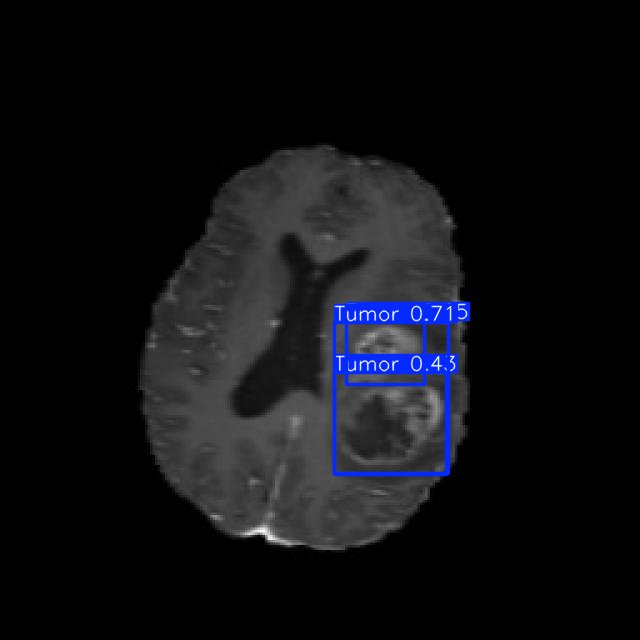

In [55]:
model = YOLO('/content/runs/detect/train2/weights/best.pt')
result = model('/content/MRI-Tumor-Detection-2/train/images/00018_101_jpg.rf.a68e0f1742c774b87c41680378e2a1b3.jpg', conf=0.25, save=True)
result[0].show()

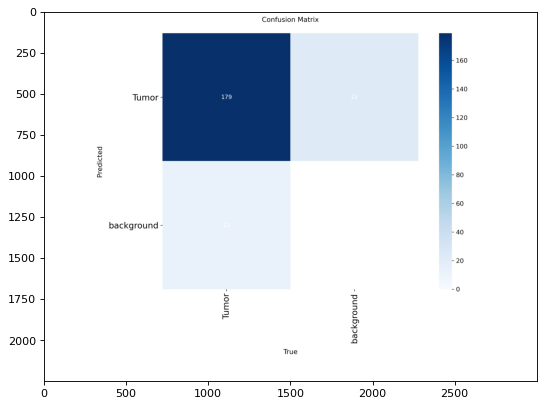

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train2/confusion_matrix.png'))

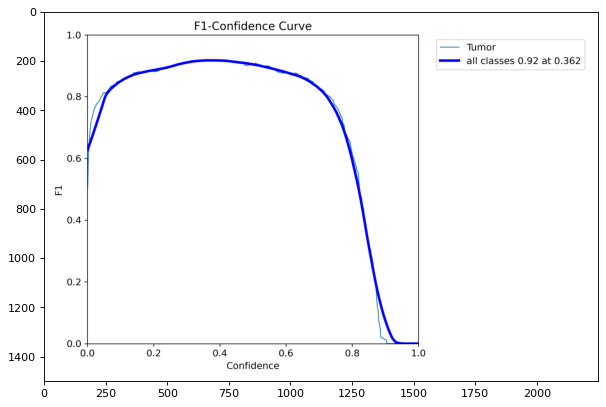

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train2/F1_curve.png'))

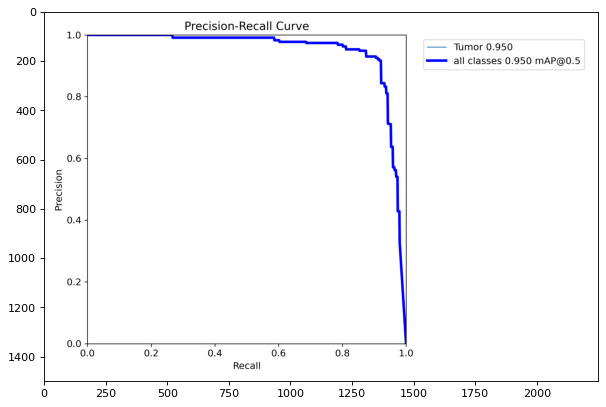

In [58]:
plt.figure(figsize=(10,6), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train2/PR_curve.png'))

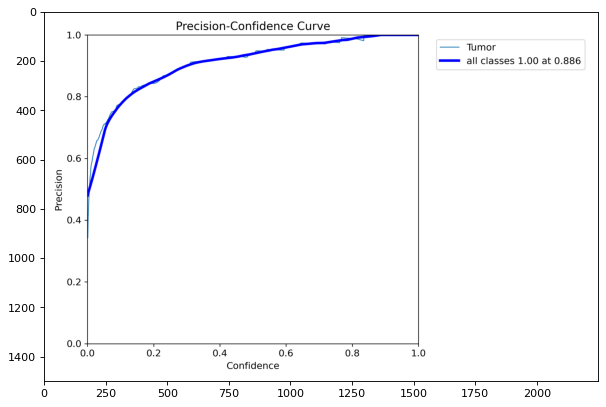

In [59]:
plt.figure(figsize=(10,6), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train2/P_curve.png'))

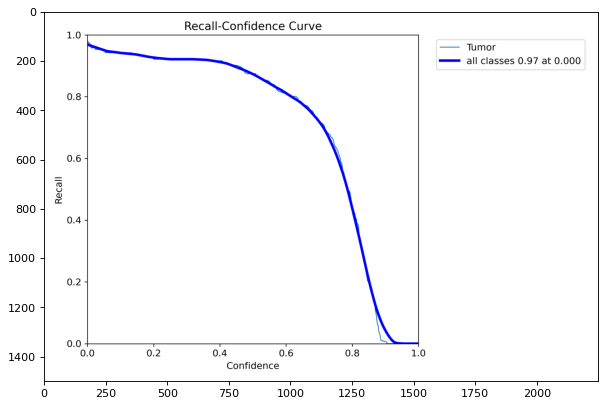

In [60]:
plt.figure(figsize=(10,6), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train2/R_curve.png'))

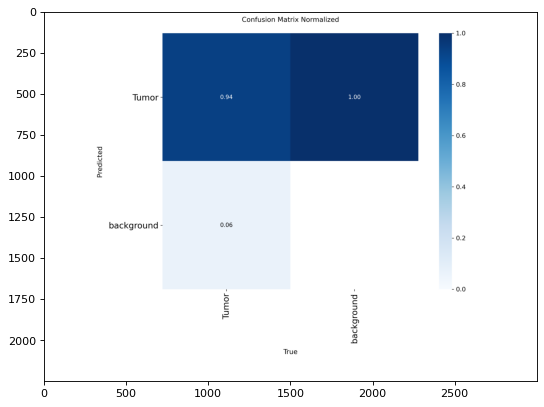

In [61]:
plt.figure(figsize=(10,6), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train2/confusion_matrix_normalized.png'))

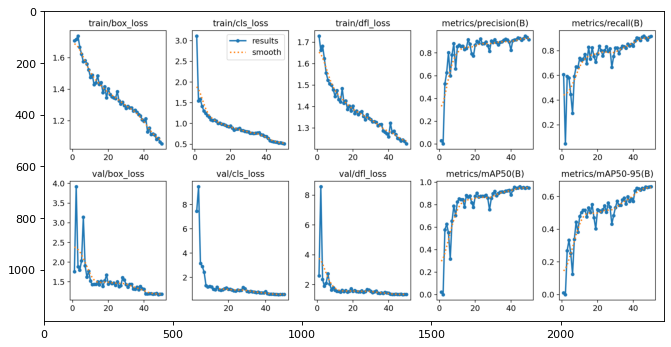

In [62]:
plt.figure(figsize=(10,14 ), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train2/results.png'))


image 1/1 /content/MRI-Tumor-Detection-2/test/images/00022_75_jpg.rf.eed25cdeb6281735fd8f0b1ecd30348b.jpg: 640x640 1 Tumor, 20.9ms
Speed: 2.2ms preprocess, 20.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict9


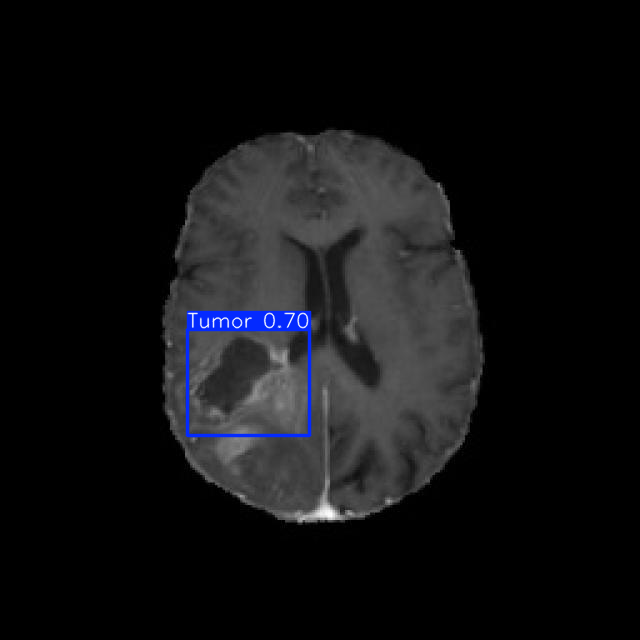

In [63]:
model = YOLO('/content/runs/detect/train2/weights/best.pt')
result = model('/content/MRI-Tumor-Detection-2/test/images/00022_75_jpg.rf.eed25cdeb6281735fd8f0b1ecd30348b.jpg', conf=0.25, save=True)
result[0].show()


image 1/123 /content/MRI-Tumor-Detection-2/test/images/00022_75_jpg.rf.eed25cdeb6281735fd8f0b1ecd30348b.jpg: 640x640 1 Tumor, 26.5ms
image 2/123 /content/MRI-Tumor-Detection-2/test/images/00053_277_jpg.rf.bdd396c5f346ac88829c6a368c29429e.jpg: 640x640 1 Tumor, 27.5ms
image 3/123 /content/MRI-Tumor-Detection-2/test/images/00088_136_jpg.rf.f3bd4f36a97269bbfc4cf9d58d9ea383.jpg: 640x640 1 Tumor, 28.8ms
image 4/123 /content/MRI-Tumor-Detection-2/test/images/00095_200_jpg.rf.7f4ff2787a316bed6ebd039b2c7e91c8.jpg: 640x640 1 Tumor, 25.9ms
image 5/123 /content/MRI-Tumor-Detection-2/test/images/00095_212_jpg.rf.5d89ce3bb547a42a522afa51d515f060.jpg: 640x640 1 Tumor, 26.5ms
image 6/123 /content/MRI-Tumor-Detection-2/test/images/00095_224_jpg.rf.c533024536aec7c31f8a83f4958b1369.jpg: 640x640 1 Tumor, 28.2ms
image 7/123 /content/MRI-Tumor-Detection-2/test/images/00095_226_jpg.rf.7b7e625c2fe6999ca4f242371b9d3cf2.jpg: 640x640 1 Tumor, 21.8ms
image 8/123 /content/MRI-Tumor-Detection-2/test/images/00097_6

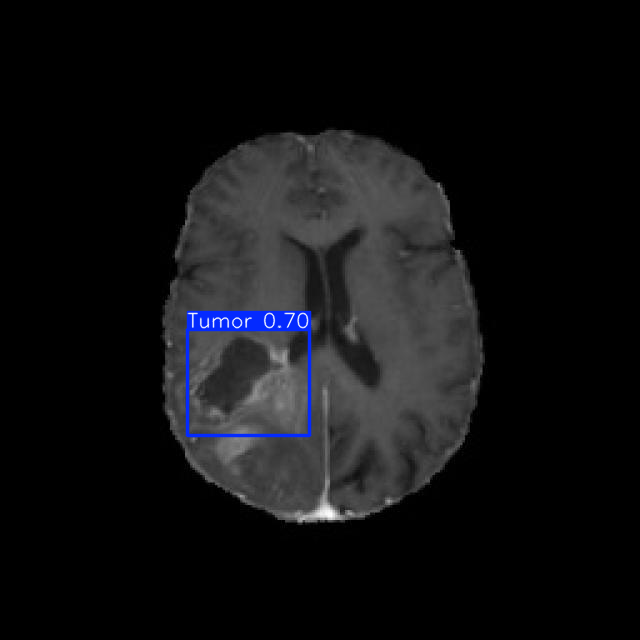

In [64]:
model = YOLO('/content/runs/detect/train2/weights/best.pt')
result = model('/content/MRI-Tumor-Detection-2/test/images', conf=0.25, save=True)
result[0].show()

In [47]:
import glob
import matplotlib.pyplot as plt

def read_images_from_folder(folder, img_ext):
  images = []

  # Corrected: Call glob.glob directly
  for filename in glob.glob(f"{folder}/*.{img_ext}"):
    img = plt.imread(filename)
    if img is not None:
      images.append(img)
  return images

def sample_images9(images):
  sample = []
  for i in range(25):
    # Corrected a typo in append
    sample.append(images[i])
  return sample

def show_images(images):
  fig = plt.figure(figsize=(6,5))
  columns = 5
  rows = 5
  for i in range(1, columns*rows + 1):
    # Corrected index: Use i-1 to access list elements starting from 0
    img = images[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img) # Pass the image to imshow
    plt.axis('off')
  plt.show()

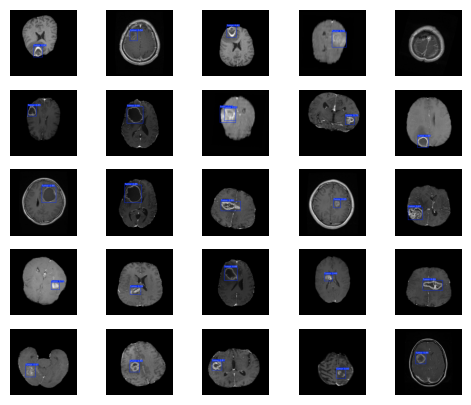

In [65]:
images_val = read_images_from_folder('/content/runs/detect/predict10','jpg')
sample_images = sample_images9(images_val)
show_images(sample_images)